# NEUS 642 - Week 4 Homework

This week we dig a little deeper into image analysis and give you the experience of working the a new (to you) library. Open CV (CV = "computer vision") is well-established suite of tools for image processing related to computer vison.  You might run an end-to-end analysis through open CV, or you might use bits and pieces for steps of a bigger analysis (smoothing, edge detection, etc.)

Today we'll be counting jelly beans, since they look kind of like neurons.

## Load opencv and a test image

If you completed the instructions in the [README](./README.md), you should have already installed opencv in your python environment.

```conda install pytables opencv```

As usual, you'll need to restart your python kernel before can import a newly installed library.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

import cv2

Load our simple demo image. Note that it's in color.

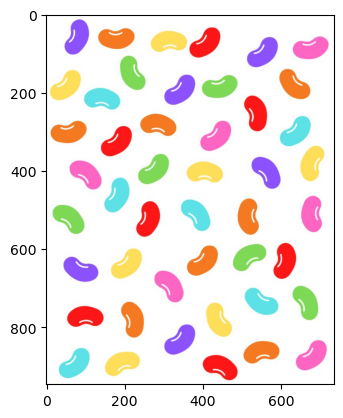

In [20]:
im=plt.imread('jelly_beans_1.jpg')
plt.imshow(im);

Color images are stored in a 3-D array, really three different images that represent the Red-Green-Blue color bands. Note also that the data is stored as `uint8` datatypes. This is memory-efficient for storing 8-bit luminance levels (0...255) and some cv2 functions complain if they don't get arrays containing variables of this datatype.

In [21]:
print("im shape:", im.shape)
print("im dtype:", im.dtype)

im shape: (946, 736, 3)
im dtype: uint8


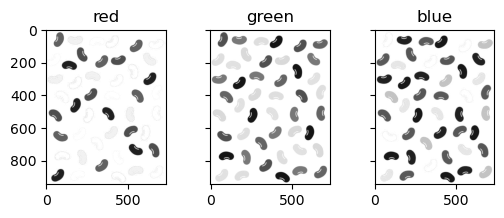

In [22]:
f,ax = plt.subplots(1,3,figsize=(6,2), sharex=True, sharey=True)
bands = ['red','green','blue']
for z, band in enumerate(bands):
    ax[z].imshow(im[:,:,z], cmap='gray')
    ax[z].set_title(band)

To keep things simple, let's average across bands for a grayscale image

gray shape: (946, 736)
gray dtype: uint8


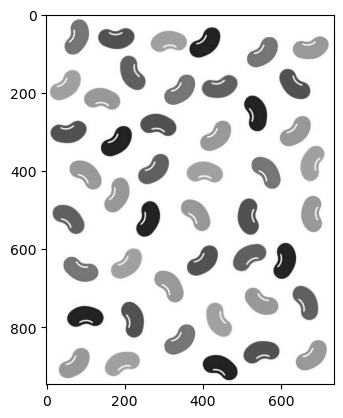

In [23]:
gray = im.mean(axis=2).astype('uint8')
plt.imshow(gray, cmap='gray');
print("gray shape:", gray.shape)
print("gray dtype:", gray.dtype)

## Question 1 - Thresholding

To count jellybeans, we need to figure out how many "blobs" of adjacent gray/black pixels are present in the image. This snippet of code uses the `cv2.contourarea` function to find outlines of blobs, and kind of gets us there.

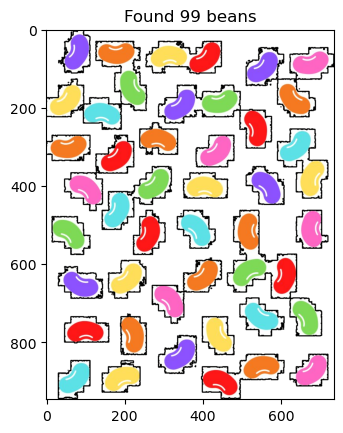

In [24]:
flip_gray = 255-gray
contours, hierarchy = cv2.findContours(flip_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img=im.copy()
for cntr in contours:
    area = cv2.contourArea(cntr)
    cv2.drawContours(contour_img, [cntr], 0, (0,0,0), 2)
plt.imshow(contour_img)
plt.title(f"Found {len(contours)} beans");

But something is not right. The coutour boundaries do not fit snuggly around the jellybeans, and the count seems off. This is because the contour function is finding **any** pixel with value in flip_gray that is different from 0. 

Often for a problem like this (especially with real images) we need to apply a threshold to exlude pixels with values that are small but not exactly 0.

Use `cv2.threshold` (or numpy equivalents) to convert `gray` to a matrix of 0's (background) and 1's (jellybeans). Then apply `findCountours` to the thresholded image. Save your results in the `contours` array so that you can test it in the following cell.

In [1]:
#Your answer here
ret1,thresh = cv2.threshold(gray, 220, 1, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'cv2' is not defined

Test it:

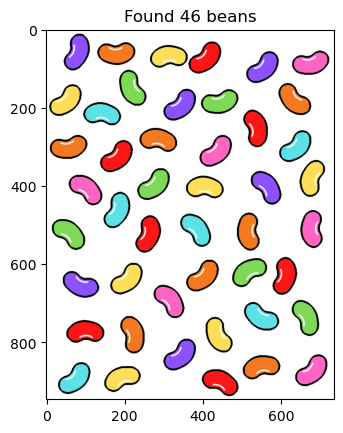

In [26]:
contour_img=im.copy()
for cntr in contours:
    area = cv2.contourArea(cntr)
    cv2.drawContours(contour_img, [cntr], 0, (0,0,0), 3)
plt.imshow(contour_img)
plt.title(f"Found {len(contours)} beans");

A couple hints: 
1. `cv2.threshold` requires 4 parameters: 
* src - the image to be threholded
* thresh - the gray level to use for thresholding
* maxval - the output value of pixels above (or below threhold).  Any number (1 or 255) makes sense here.
* type - this specifies the threshold type, which includes the sign of the threshold. Important: You want the dark parts of the image to return 1 and light parts to return as 0. You can invert the sign of the image with the appropriate threshold_type. Search around for information/examples on cv2.ThresholdType.
2. You can use `plt.hist(x.flatten())` to plot a histgram of grayscale values in an image `x`. This may help you pick the threshold value

## Question 2 - Count only the red jellybeans

Now we want to count just the red jellybeans. Notice that if we extract the blue color plane, the red jellybeans show up as distinctly dark. 

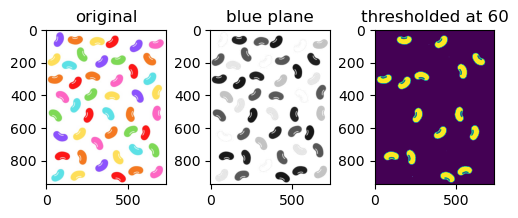

In [27]:
red=im[:,:,2]
threshold = 60

f,ax=plt.subplots(1,3,figsize=(6,2))
ax[0].imshow(im)
ax[0].set_title('original')
ax[1].imshow(red, cmap='gray')
ax[1].set_title('blue plane')
ret1,thresh = cv2.threshold(red, threshold, 1, cv2.THRESH_BINARY_INV)
ax[2].imshow(thresh);
ax[2].set_title(f'thresholded at {threshold}');

This separation captures the red and orange jellybeans nicely.  We can reduce the threshold to only capture red:

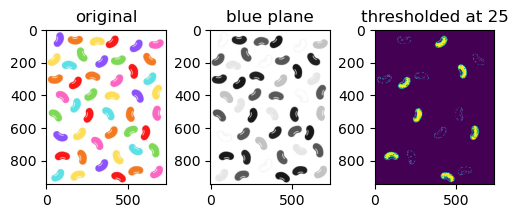

In [28]:
red=im[:,:,2]
threshold = 25

f,ax=plt.subplots(1,3,figsize=(6,2))
ax[0].imshow(im)
ax[0].set_title('original')
ax[1].imshow(red, cmap='gray')
ax[1].set_title('blue plane')
ret1,thresh = cv2.threshold(red, threshold, 1, cv2.THRESH_BINARY_INV)
ax[2].imshow(thresh);
ax[2].set_title(f'thresholded at {threshold}');

But what happens when we find contours?

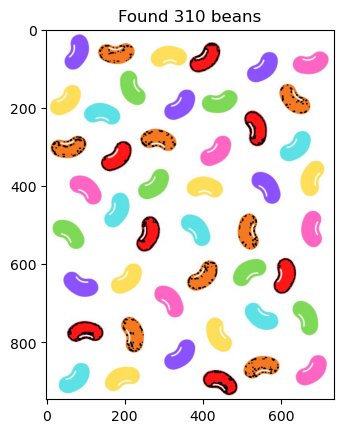

In [29]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img=im.copy()
for cntr in contours:
    area = cv2.contourArea(cntr)
    cv2.drawContours(contour_img, [cntr], 0, (0,0,0), 2)
plt.imshow(contour_img)
plt.title(f"Found {len(contours)} beans");

The orange jellybeans left speckle in the image that messed up our count. Speckle/noise is a real issue for many images. We need to smooth the image to remove that noise before thresholding.

Use `cv2.GaussianBlur` (or some numpy equivalent) to smooth the `red` image before thresholding. Then detect blobs and save to `contours`. Can you get the correct count?

In [30]:
red = im[:,:,2]

# Your answer here:
threshold = 30
blur=cv2.GaussianBlur(red,(21,21),5)
ret1,thresh = cv2.threshold(blur, threshold, 1, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Test your code:

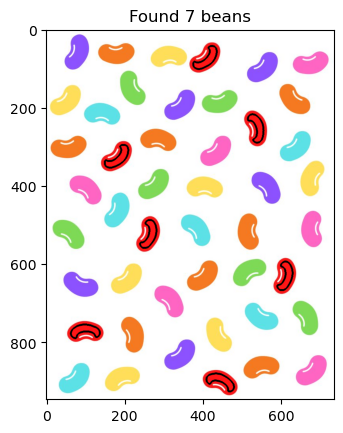

In [31]:
contour_img=im.copy()
for cntr in contours:
    area = cv2.contourArea(cntr)
    cv2.drawContours(contour_img, [cntr], 0, (0,0,0), 3)
plt.imshow(contour_img)
plt.title(f"Found {len(contours)} beans");

Hints: 
1. Play around with various combinations of parameters to `GaussianBlur` and `threshold` and plot the resulting image to see what it looks like before you measure contours.
2. `GausianBlur` requires 3 parameters:
* src - the image
* the `ksize` parameter needs to be a tuple. `(x,x)` will define the kernel to be an x by x square.
* `SigmaX` can be a single number, the size of the Gaussian smoothing.

## Bonus - Dealing with overlap

Let's look at a bit tougher, but maybe more realistic, image:

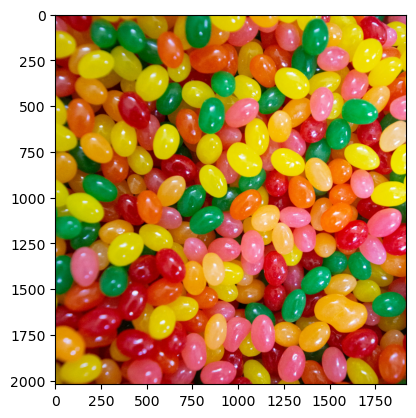

In [153]:
im2=plt.imread('jelly_beans_2.jpg')
plt.imshow(im2);

* How do things work (or not work) if you try a similar approach to count all or one color of jellybean here?
* What strategies could you use to count beans of either one or all colors?

This is a tough problem, and maybe material a full lecture/presentation!

In [ ]:
# Thoughts?

